In [66]:
# import all necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [67]:
# importing the train and test dataset
df1=pd.read_csv("C:\\Users\\rishabh\\Downloads\\Data\\Train.csv")
df2=pd.read_csv("C:\\Users\\rishabh\\Downloads\\Data\\Test.csv")
df1.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


Check for Missing Values

In [68]:
df1.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

In [69]:
df2.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

No missing value in either dataset,both are clean.

In [70]:
df1.shape

(1600, 6)

**Analysing Numerical Features**

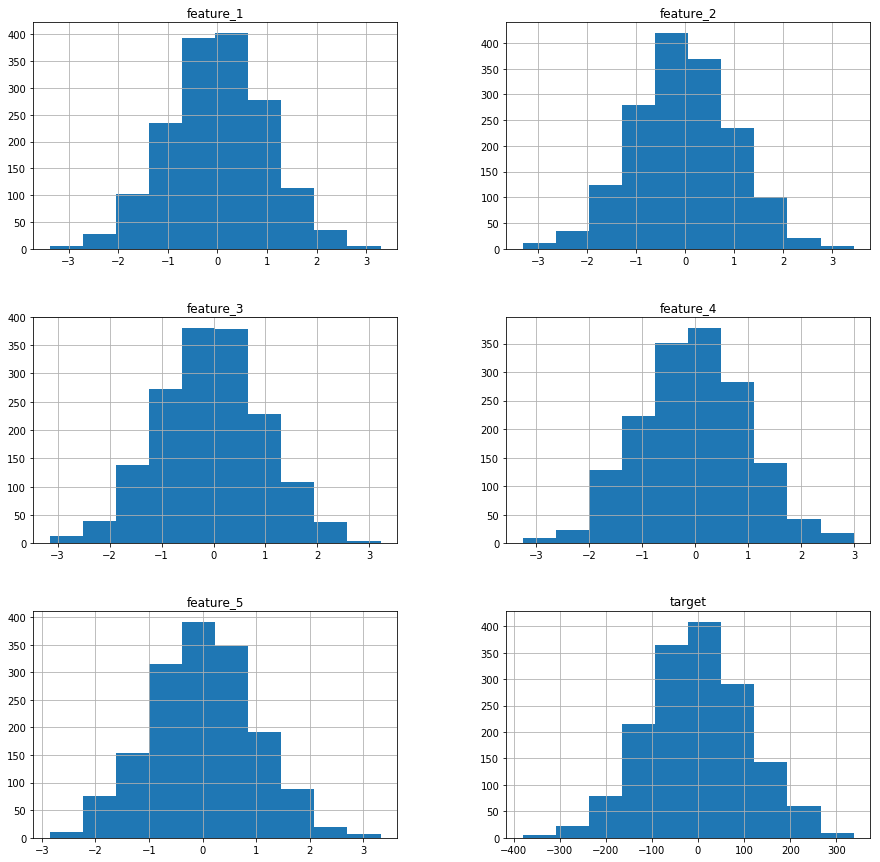

In [71]:
# Distributiion of numerical data
plt.rcParams['figure.figsize']=[15, 5]
df1.hist(figsize=(15, 15))
plt.show()

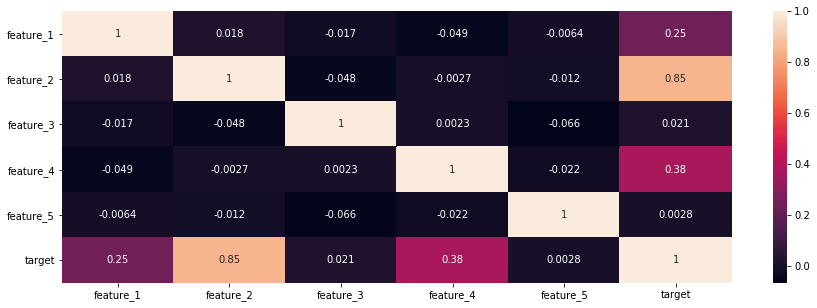

In [72]:
# Finding correlation between different features
sns.heatmap(df1.corr(method='spearman'),annot=True)

1. Feature_2 has a good correlation with the target variable at 0.85 followed by Feature_4 at 0.38
2. None of the feature have good relationship wth each other.

In [73]:
data=df1.append(df2)

In [74]:
# Setting the target variable
y=data.target

In [75]:
# Dataset to be used for prediction
X = data.loc[:,data.columns!='target']
#
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,0.293416,-0.945599,-0.421105,0.406816,0.525662
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997
2,0.236425,0.132836,-0.147723,0.699854,-0.187364
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077


### Linear Regression Model

In [76]:
#Splitting data into two , test and train
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)

In [77]:
#Implementing Linear Regression Model with multiple variables for prediction
from sklearn.linear_model import LinearRegression
reg=LinearRegression(fit_intercept=True)
model=reg.fit(x_train, y_train)
prediction=model.predict(x_test)

In [78]:
# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2_score(y_test, prediction)

0.9689475553675861

In [79]:
# Calculating mean Squared Error for the model
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, prediction)

424.6032963996915

### Plot for the Model

400


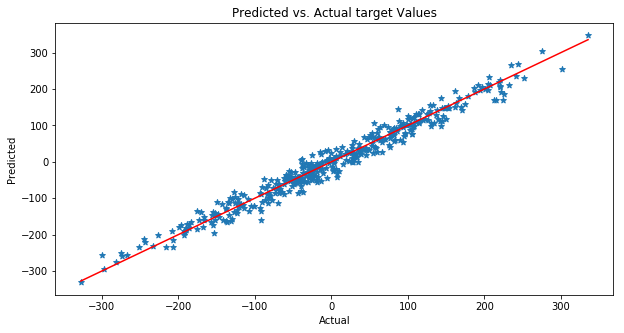

In [80]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, marker='*')
print(prediction.size)
plt.title('Predicted vs. Actual target Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')

In [81]:
output=pd.DataFrame({'target': prediction})
output.to_csv('predictions.csv', index=False)

### Cross- Validation

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()), ('model', LinearRegression(fit_intercept=True))])

In [83]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, cv=5, scoring='r2') #specify scoring as r2 for r-squared

In [84]:
print(scores)

[0.96235629 0.96941757 0.96700343 0.96433061 0.96914884]


In [85]:
print(scores.mean())

0.9664513491196602


**R-squared values for cross validation and our previously predicted model is almost the same.**

In [86]:
from sklearn.model_selection import cross_val_score
scores = -1 * cross_val_score(my_pipeline , X, y, cv=5, scoring='neg_mean_squared_error')
print(scores.mean())

414.40916276938805


**The Mean Squared Error reduces slightly in this model.**

2000


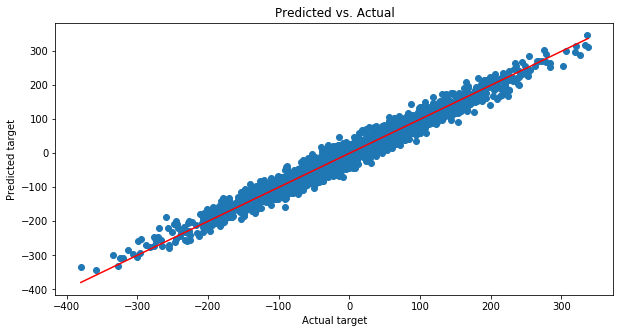

In [63]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(my_pipeline, X, y, cv=5)
plt.figure(figsize=(10,5))
print(y.size)
plt.scatter(y, predicted)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual target')
plt.ylabel('Predicted target')
plt.plot([min(y), max(y)], [min(y), max(y)],'r')